In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import  confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


In [2]:
# read the dataset from dir
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Supervised and Unsupervised 
# ans: Supervised ->target column
# Regreesion or classification 
# ans: classification 
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#independent features->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
 #      'BMI', 'DiabetesPedigreeFunction', 'Age'
#dependent features->Outcome
# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#(row,columns)
df.shape

(768, 9)

In [8]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='count'>

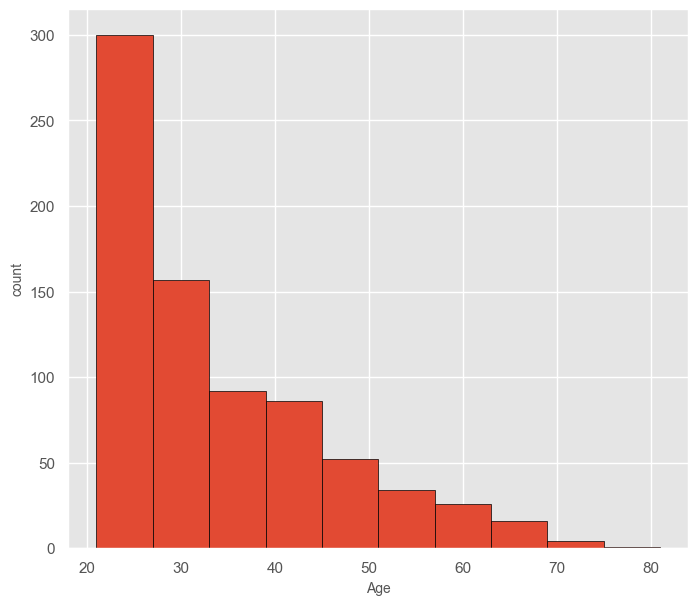

In [9]:
plt.figure(figsize=(8,7))
plt.xlabel('Age',fontsize=10)
plt.ylabel('count', fontsize=10)
df['Age'].hist(edgecolor='black')

In [10]:
df['Age'].max()


np.int64(81)

In [11]:
df['Age'].min()


np.int64(21)

In [12]:
print("MAX AGE:"+ str(df['Age'].max())) 
print("MIN AGE:"+ str(df['Age'].min()))

MAX AGE:81
MIN AGE:21


<Axes: xlabel='Age', ylabel='Density'>

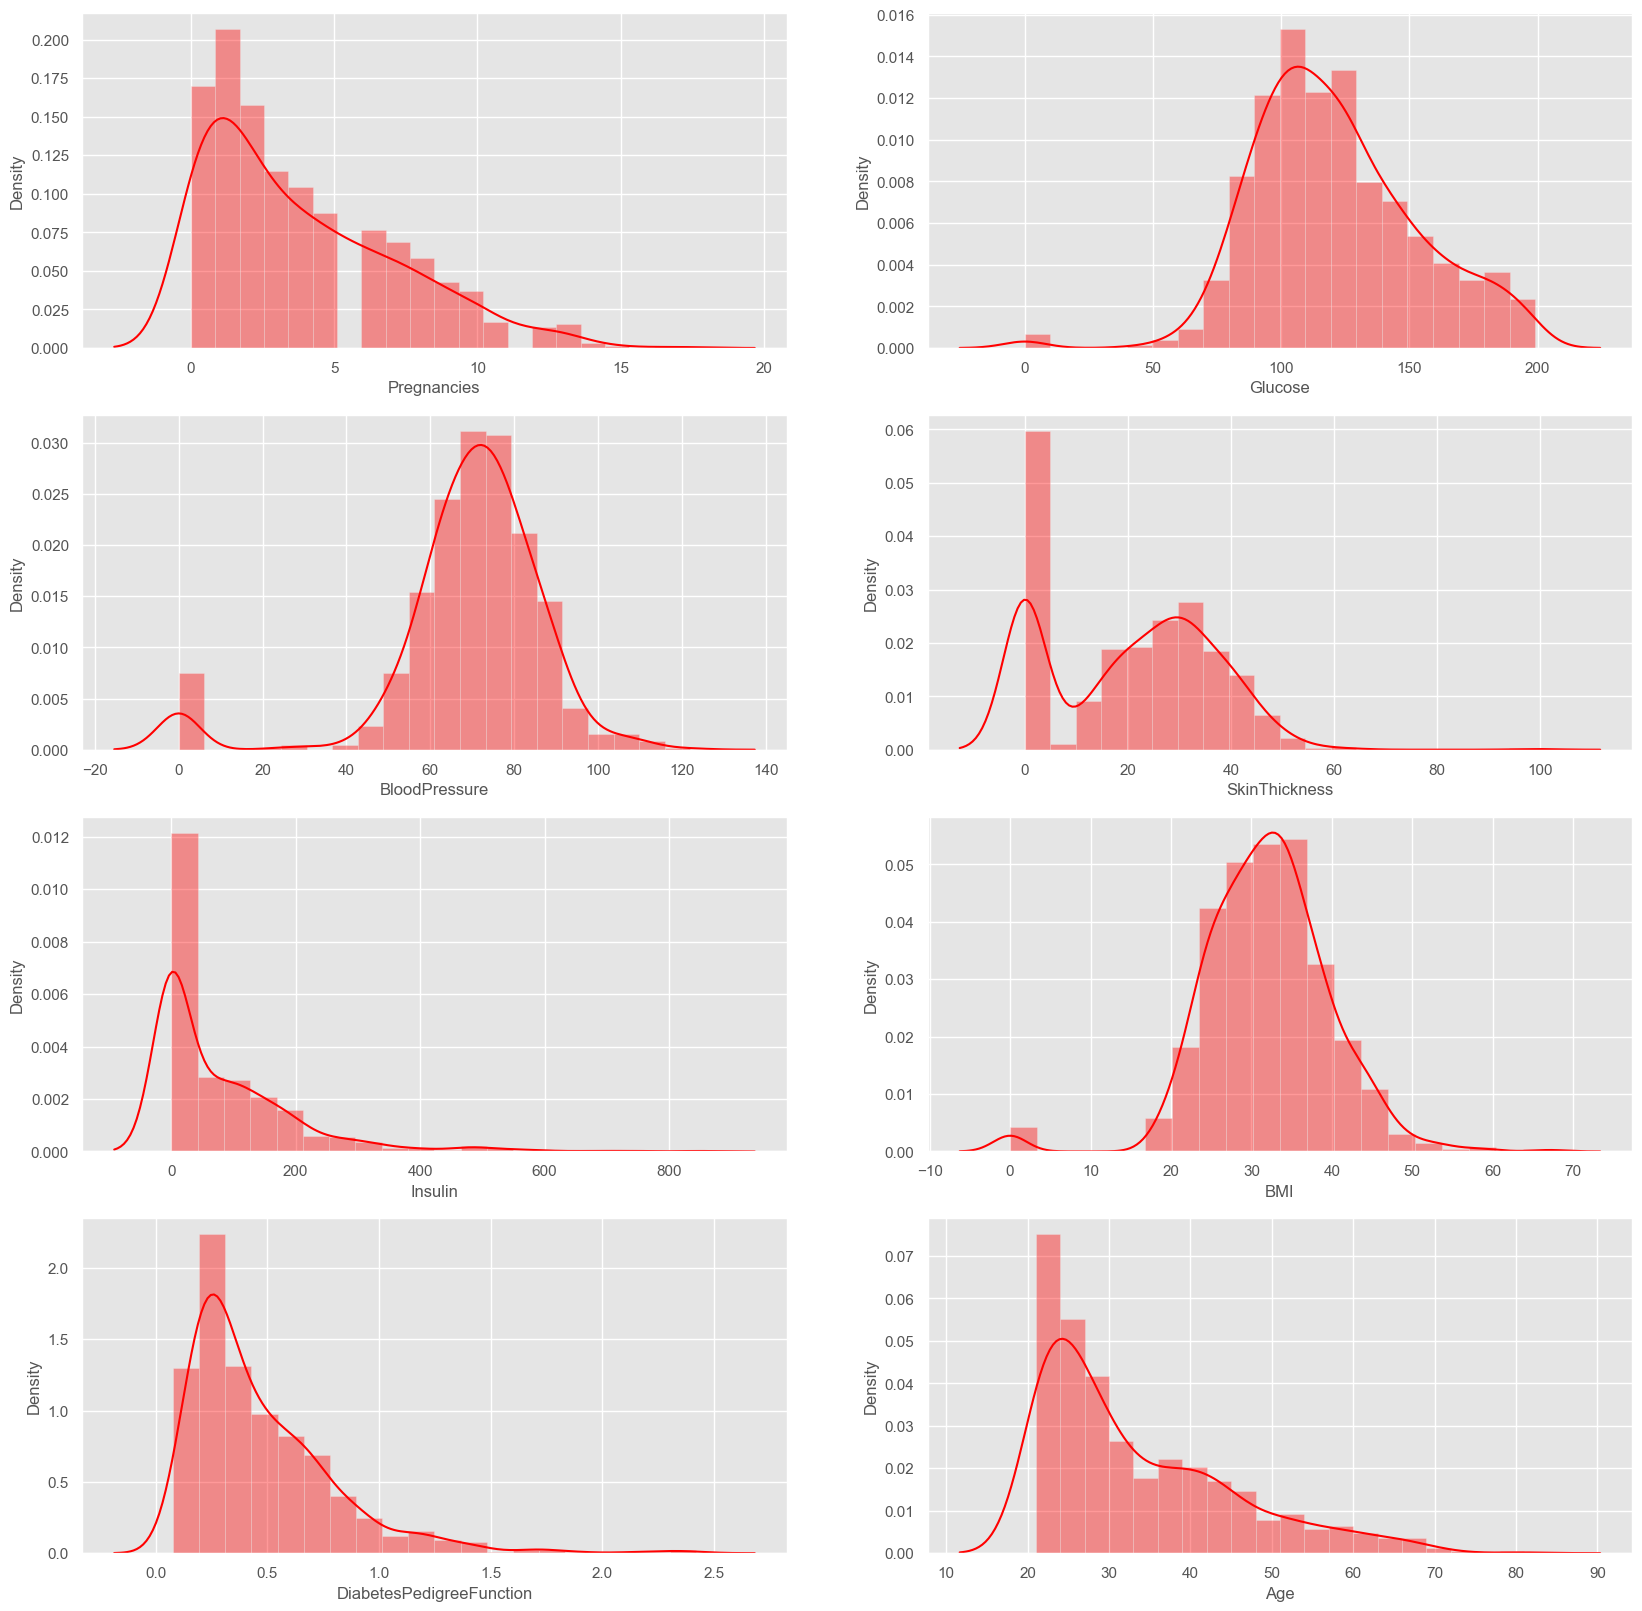

In [13]:
# density figure 
#4*2=8
#columns=2 figure
#having 4 row

#[0,0], [0,1]
#[1,0], [1,1]
#[2,1], [2,1]
#[3,0], [3,1]


fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")



In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.groupby("Outcome").agg({'Pregnancies': 'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [16]:
df.groupby("Outcome").agg({'Pregnancies': 'max'})


,Pregnancies
Outcome,
0,13
1,17


In [17]:
df.groupby("Outcome").agg({'Glucose': 'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [18]:
df.groupby("Outcome").agg({'Glucose': 'max'})


,Glucose
Outcome,
0,197
1,199


In [19]:
df.groupby("Outcome").agg({'BloodPressure': 'mean'})


,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [20]:
df.groupby("Outcome").agg({'BloodPressure': 'max'})

,BloodPressure
Outcome,
0,122
1,114


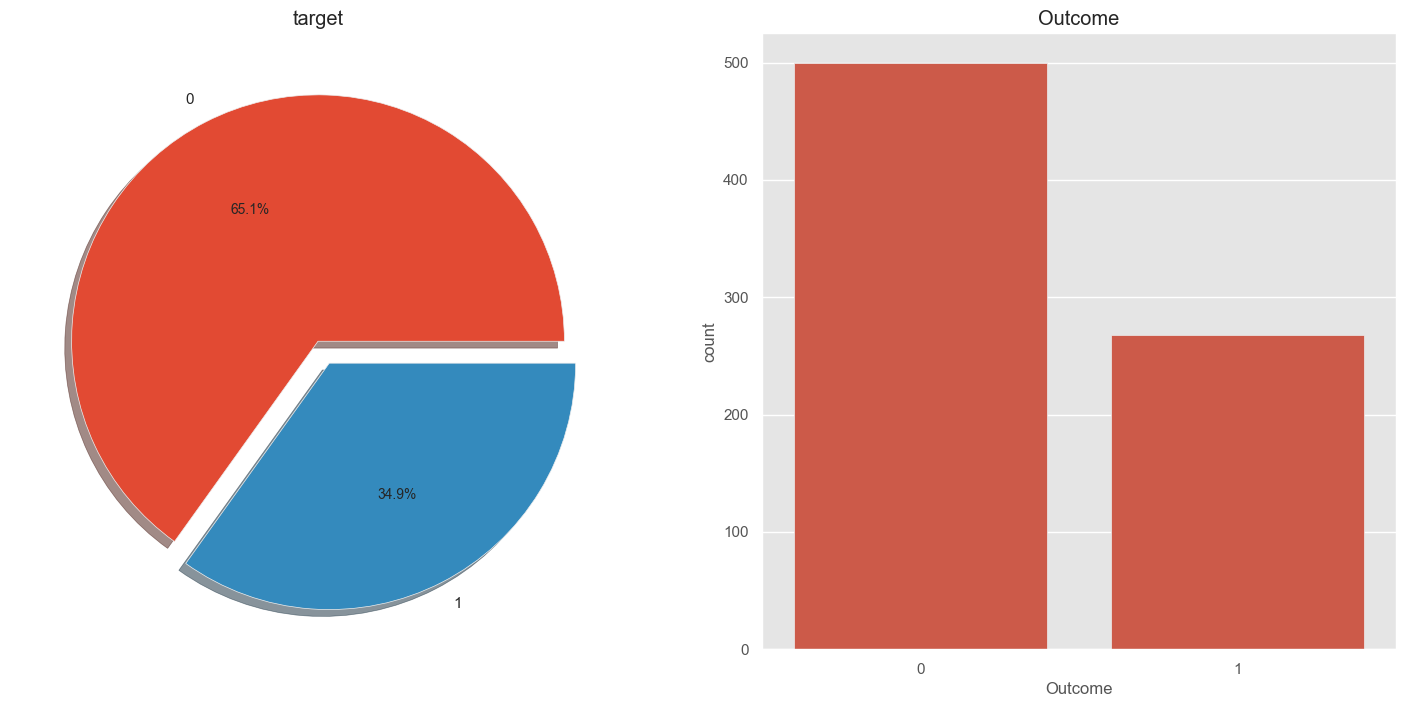

In [21]:
f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot( x='Outcome', data = df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [22]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


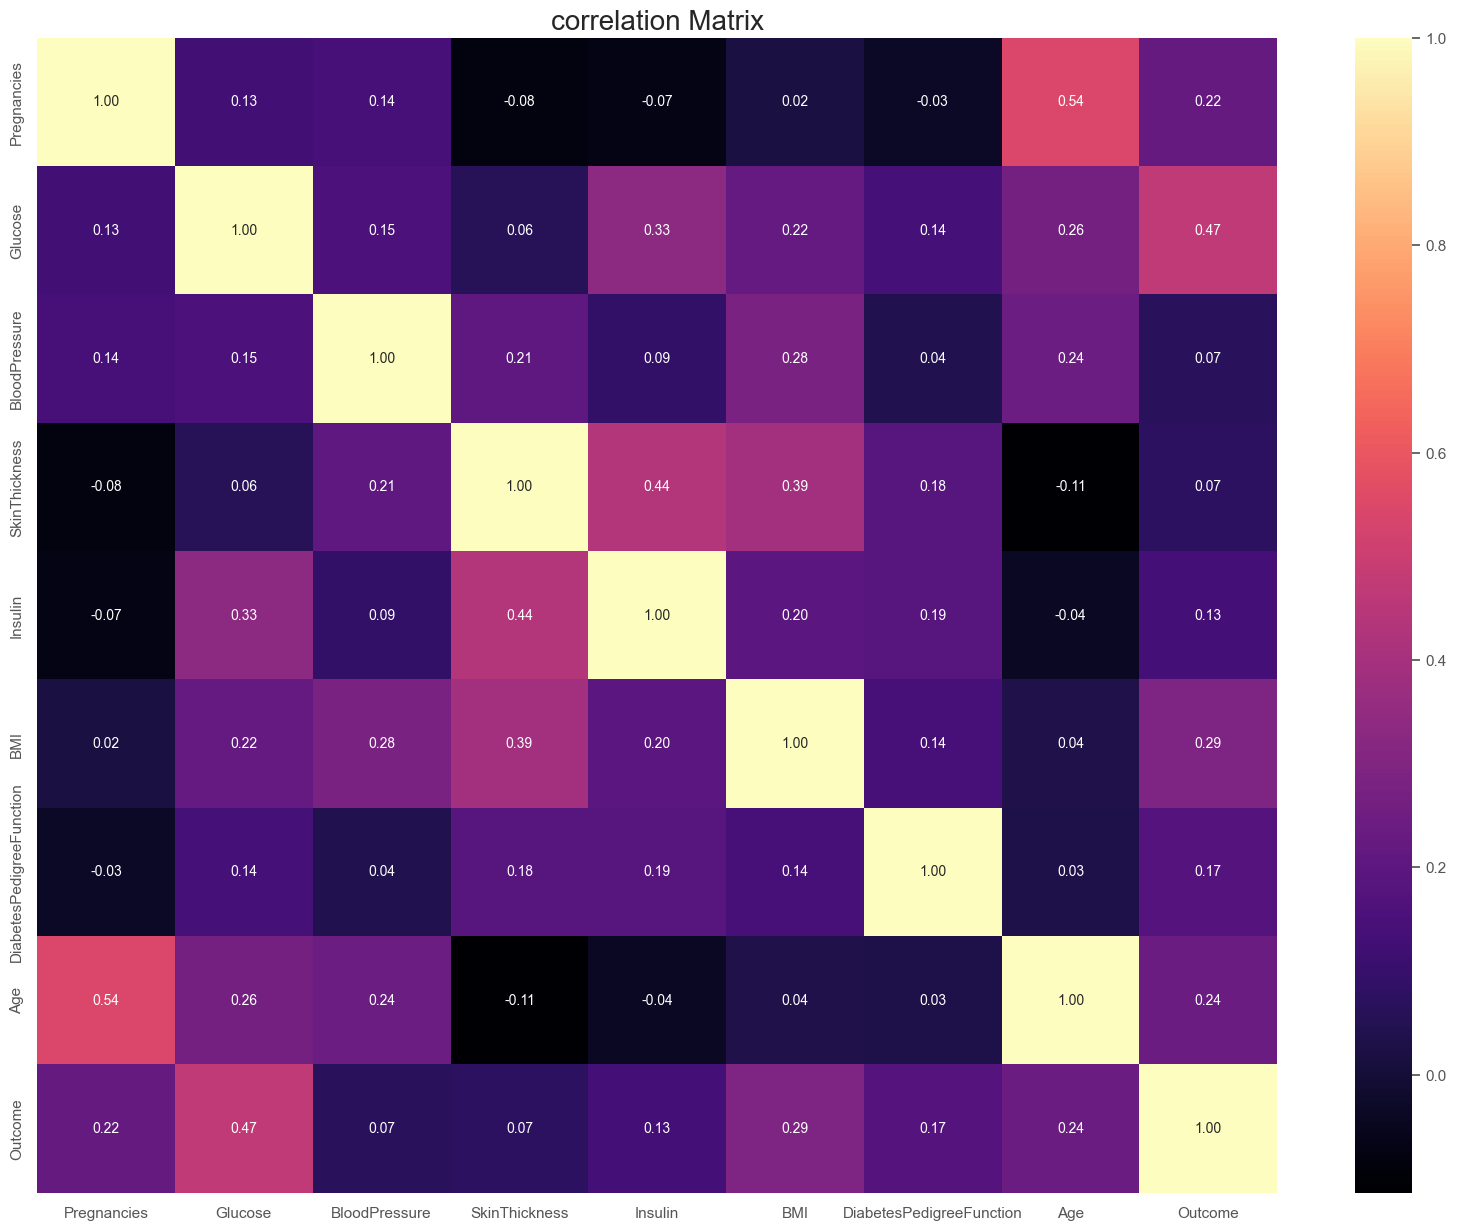

In [23]:
f,ax = plt.subplots( figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', ax=ax, cmap='magma')
ax.set_title("correlation Matrix", fontsize=20)
plt.show()

In [24]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [26]:
#data preprocessing part
df.isnull() .sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
import sys
sys.path.append('/path/to/package_or_module')


<Axes: >

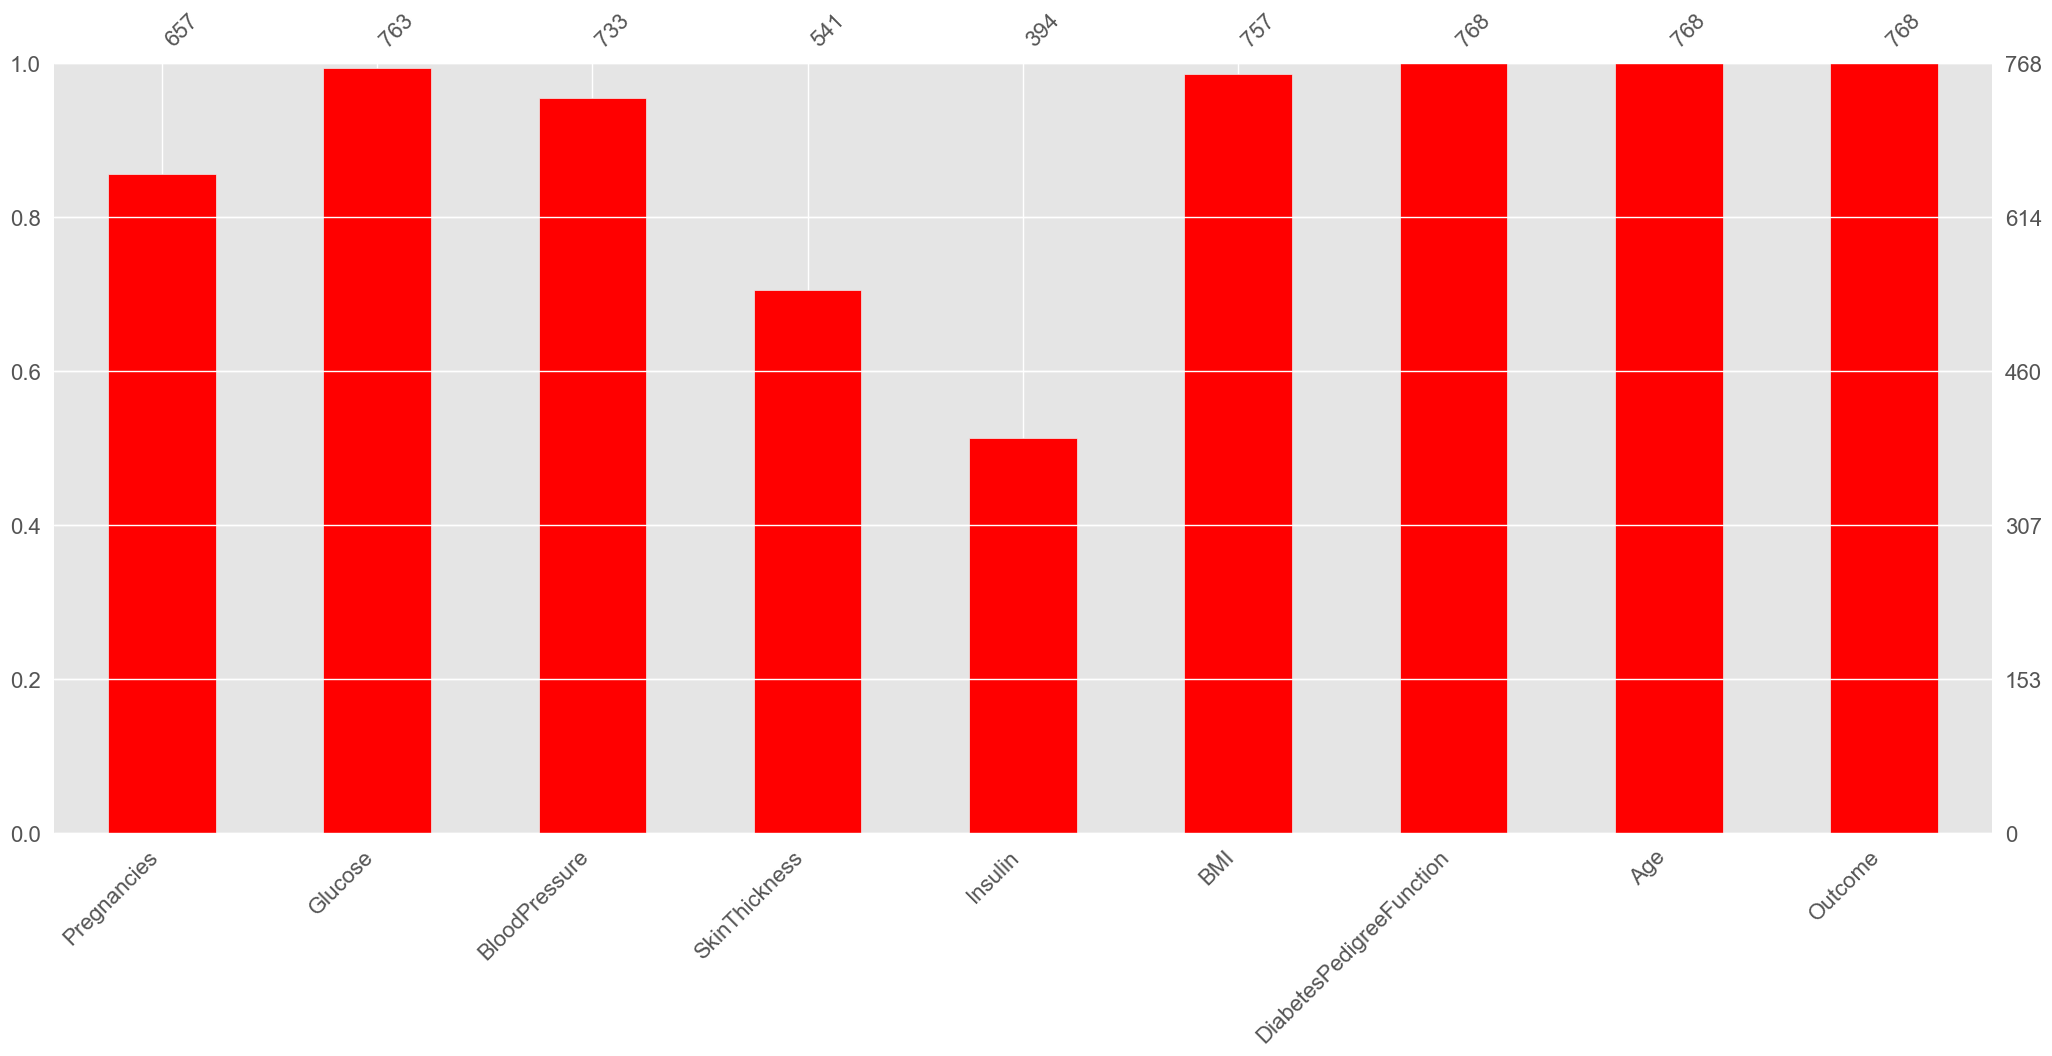

In [29]:
import missingno as msno
msno.bar(df, color="red")

In [30]:
# median
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index() 
    return temp

In [31]:
columns = df.columns
columns = columns.drop('Outcome')
for i in columns:
    median_target(i)
    df.loc[(df['Outcome']==0)& (df[i].isnull()), i]= median_target(i)[i][0]
    df.loc[(df['Outcome']==1)& (df[i].isnull()), i]= median_target(i)[i][1]
    

In [32]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [33]:
df.isnull() .sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

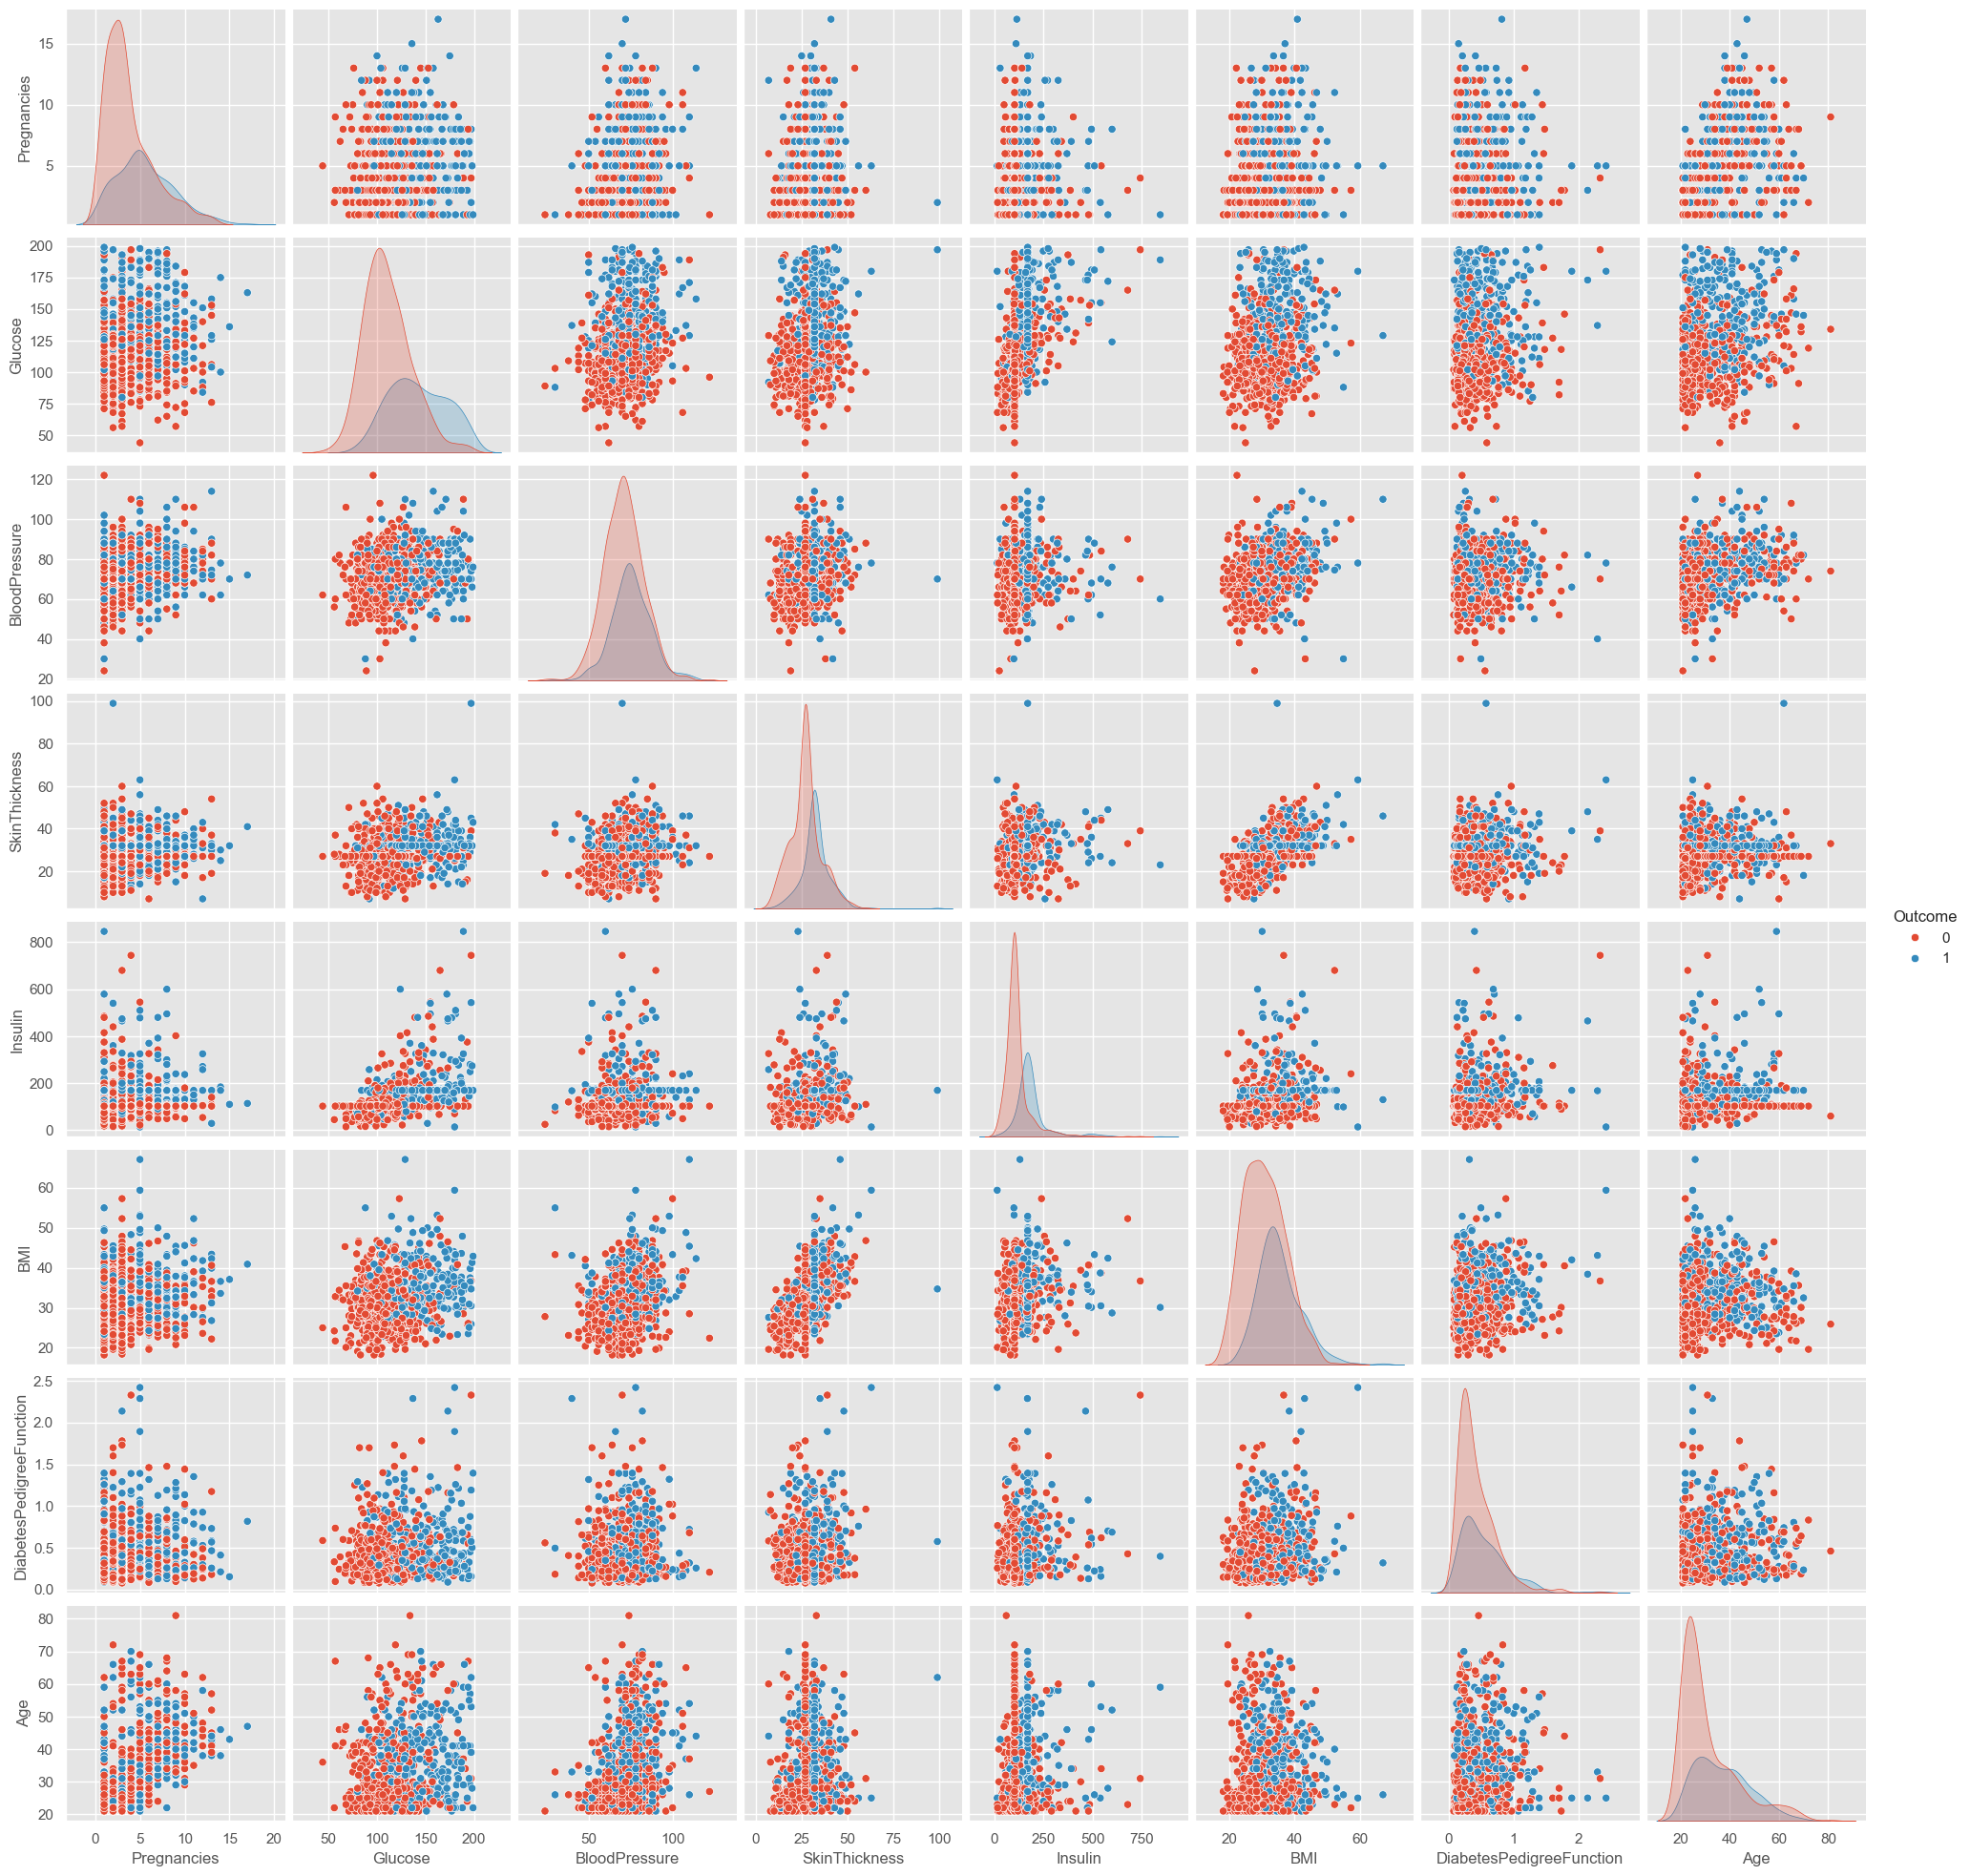

In [34]:
p = sns.pairplot(df, hue="Outcome")

In [35]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")
    

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

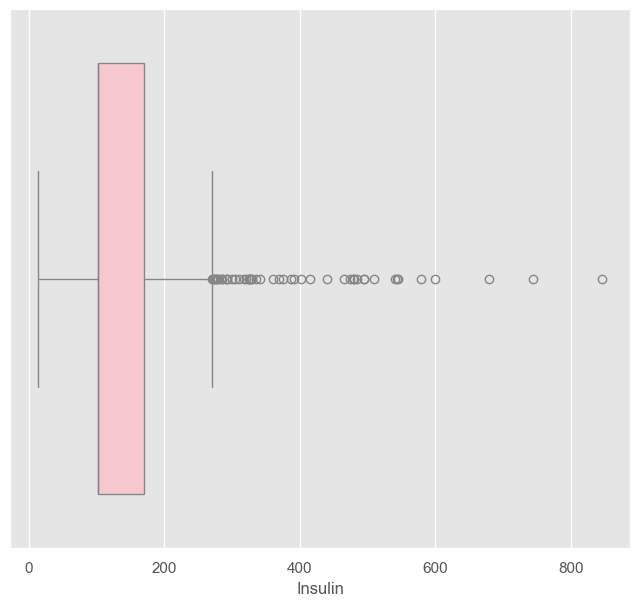

In [36]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="pink")

In [37]:

Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df["Insulin"]>upper, "Insulin"]= upper

<Axes: xlabel='Insulin'>

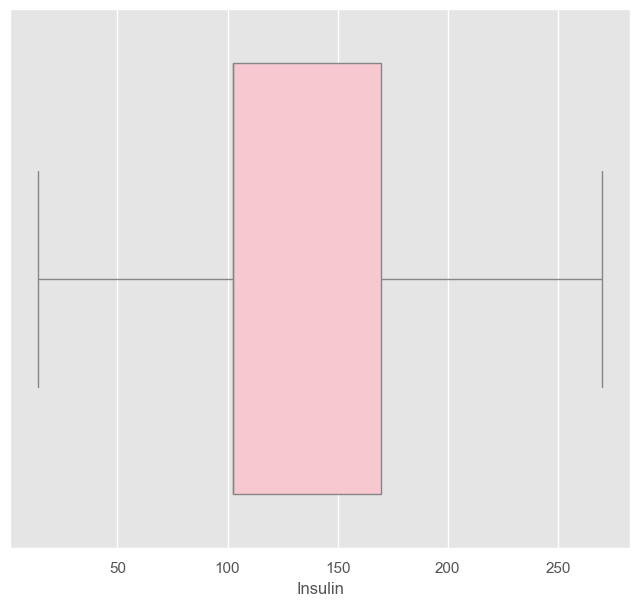

In [38]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="pink")

In [39]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10 )
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [40]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

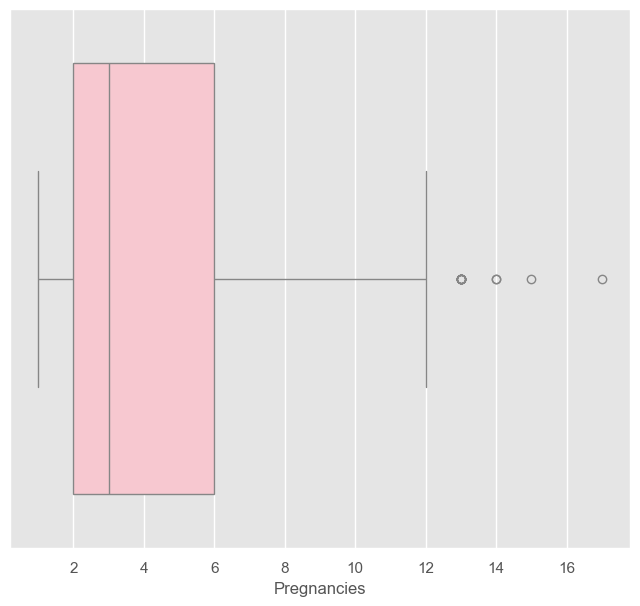

In [41]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="pink")

In [42]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [43]:
thresold = np.sort(df_scores)[7]

In [44]:
thresold

np.float64(-1.7497423670960557)

In [45]:
outlier = df_scores>thresold

In [46]:
outlier

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,

In [47]:
df = df[outlier]

In [48]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [49]:
df.shape

(760, 9)

In [50]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
# Feature Enginnerring
NewBMI = pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2", "Obesity 3"] ,dtype = "category")

In [52]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [53]:
df["NewBMI"]= NewBMI
df.loc[df["BMI"]<18.5, "NewBMI" ] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"]= NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"]= NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"]= NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"]= NewBMI[4]
df.loc[df["BMI"]<39.9, "NewBMI" ] = NewBMI[5]

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 3
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 3
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 3
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 2


In [55]:
def set_insuline(row):
    if row["Insulin"]>=16  and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

     

In [56]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 3,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 3,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 3,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 3,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 2,Abnormal


In [58]:
NewGlucose = pd.Series(["Low","Normal","Overweight","Secret", "High"] ,dtype = "category")
df["NewGlucose"]= NewGlucose
df.loc[(df["Glucose"]<= 70), "NewGlucose" ] = NewGlucose[0]
df.loc[(df["Glucose"]  >70) & (df["Glucose"]<=99), "NewGlucose"]= NewBMI[1]
df.loc[(df["Glucose"] > 99) &( df["Glucose"]<=126 ), "NewGlucose"]= NewBMI[2]
df.loc[(df["Glucose"]<= 126), "NewGlucose" ] = NewGlucose[3]

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 3,Abnormal,Low
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 3,Normal,Secret
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 3,Abnormal,Overweight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 3,Normal,Secret
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 2,Abnormal,High


In [60]:
df = pd.get_dummies(df, columns = [ "NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,False,True,False,False,False,True,False,False,False
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,True,False,False,True,False,False,False,True
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,True,False,False,False,False,False,True,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,True,False,False,True,False,False,False,True
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,True,False,False,False,False,False,False,False,False


In [62]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [63]:
categorical_df = df [['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [64]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,False,True,False,False,False,True,False,False,False
1,False,False,True,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,False,True,False
3,False,False,True,False,False,True,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False


In [65]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [66]:
cols = X.columns
index = X.index

In [67]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [68]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [69]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [70]:
X = pd.concat([X, categorical_df], axis=1)

In [71]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,False,False,True,False,False,False,True,False,False,False
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,False,True,False,False,True,False,False,False,True
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,False,True,False,False,False,False,False,True,False
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,False,True,False,False,True,False,False,False,True
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,True,False,False,False,False,False,False,False,False


In [72]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Machine learning Alog
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = log_reg.predict(X_test)

In [76]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8486842105263158

In [77]:
accuracy_score(y_test, log_reg.predict(X_test))

0.8947368421052632

In [78]:
confusion_matrix(y_test, y_pred)

array([[88, 10],
       [ 6, 48]])

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        98
           1       0.83      0.89      0.86        54

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.90      0.89      0.90       152



In [80]:
#KNN

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8782894736842105
0.9013157894736842
[[88 10]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        98
           1       0.83      0.91      0.87        54

    accuracy                           0.90       152
   macro avg       0.89      0.90      0.89       152
weighted avg       0.91      0.90      0.90       152



In [82]:
#SVM
svc = SVC(probability= True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05,0.5,  0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [83]:
# best_parameter
grid_search.best_params_

{'C': 0.5, 'gamma': 0.1}

In [84]:
grid_search.best_score_

np.float64(0.8618479880774963)

In [85]:
svc = SVC(C=0.5, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8305921052631579
0.8881578947368421
[[87 11]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       0.81      0.89      0.85        54

    accuracy                           0.89       152
   macro avg       0.87      0.89      0.88       152
weighted avg       0.89      0.89      0.89       152



In [86]:
# Decision Tree

In [87]:
DT = DecisionTreeClassifier()
DT .fit(X_train, y_train)
y_pred = DT .predict(X_test)
print(accuracy_score(y_train, DT .predict(X_train)))
print(accuracy_score(y_test, DT .predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8486842105263158
[[84 14]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        98
           1       0.76      0.83      0.80        54

    accuracy                           0.85       152
   macro avg       0.83      0.85      0.84       152
weighted avg       0.85      0.85      0.85       152



In [88]:
# hyperparameter tuning of dt
grid_param ={
    'criterion': ['gini', 'entropy'],
    'max_depth' : [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
     'min_samples_split':[1,2,3,5,7],
    'max_features':['auto', 'sqrt', 'log2'],
    
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1 )
grid_search_dt.fit(X_train,y_train)


Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [89]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [90]:
grid_search_dt.best_score_

np.float64(0.8692307692307693)

In [91]:
DT = grid_search_dt.best_estimator_
y_pred = DT .predict(X_test)
print(accuracy_score(y_train, DT .predict(X_train)))
print(accuracy_score(y_test, DT .predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8717105263157895
0.8552631578947368
[[81 17]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        98
           1       0.74      0.91      0.82        54

    accuracy                           0.86       152
   macro avg       0.84      0.87      0.85       152
weighted avg       0.87      0.86      0.86       152



In [92]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75,min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130 )
rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [93]:
y_pred = rand_clf.predict(X_test)

In [94]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf .predict(X_train)))
print(accuracy_score(y_test,rand_clf .predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9901315789473685
0.8947368421052632
[[89  9]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        98
           1       0.84      0.87      0.85        54

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.90      0.89      0.90       152

